## Declare Packages

In [1]:
from torchvision.models.resnet import resnet50 , ResNet50_Weights
from torch import nn


## Declaare Model

In [2]:
model =resnet50(weights= ResNet50_Weights.IMAGENET1K_V1)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
model_weights = [] #This will show model weights
conv_layers = [] # This will conv_layers
# get all the model children as list
model_children = list(model.children())

In [4]:

count = 0  # Keeping counts of how many Conv2D
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        count += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    count += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {count}")

Total convolutional layers: 49


In [5]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([64, 3, 7, 7])
CONV: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [6]:
len(model_weights[-1])

2048

tensor([[[ 3.5144e-03]],

        [[ 3.9855e-02]],

        [[-2.4795e-02]],

        [[-2.7827e-02]],

        [[ 8.8871e-02]],

        [[-2.2322e-03]],

        [[-1.9144e-02]],

        [[-5.5382e-02]],

        [[ 5.7721e-02]],

        [[-2.4470e-02]],

        [[-9.0976e-03]],

        [[ 3.7905e-02]],

        [[-2.7061e-02]],

        [[ 7.5568e-09]],

        [[-5.4823e-03]],

        [[ 8.2370e-02]],

        [[-1.1916e-01]],

        [[ 7.0124e-02]],

        [[-2.1503e-01]],

        [[-4.7945e-02]],

        [[-1.6955e-01]],

        [[ 1.3522e-02]],

        [[-1.3495e-01]],

        [[-1.4973e-01]],

        [[ 4.6628e-02]],

        [[-1.1574e-01]],

        [[-7.8889e-02]],

        [[ 7.4166e-02]],

        [[ 4.0089e-02]],

        [[-3.0206e-02]],

        [[ 6.7508e-02]],

        [[ 2.1266e-02]],

        [[ 1.2126e-01]],

        [[-1.9980e-01]],

        [[-3.3678e-02]],

        [[-6.4661e-02]],

        [[-1.9922e-02]],

        [[ 4.1209e-03]],

        [[-1

KeyboardInterrupt: 

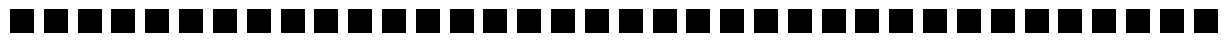

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[1]):
    print(filter.shape)
    plt.subplot(46, 46, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('./outputs/filter.png')
plt.show()